In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# A Discrete Convolution Program (5 pts)

### Collaborators: None

Write a discrete convolution function `myConv` that convolves two arrays {$f_i, i = 0, \dots , N_f-1$}
and {$w_j, j = 0, \dots , N_w-1$} to obtain an output time series {$g_n$}. For simplicity, assume a fixed sampling interval $\Delta = 1$, and further, that $f$ and $w$ are $0$ outside of their sampled regions. 

 1. How long is {$g_n$}? In other words, how many non-zero points can it have? Justify your answer. 
 2. Please copy and paste your function `g = myConv(f, w)` to the PDF report.
 3. Provide a test to convince yourself (and me) that your function agrees with `numpy.convolve`. For example, generate two random timeseries $f$, $w$ with $N_f=150$, $N_w=100$, drawing each element from $U[0,1]$, and plot the difference between your function's output and numpy's. Include the code for your test in the PDF report.
 4. Compare the speed of your `myConv` function to the NumPy function. Provide a plot of the comparison, and include your python code in the PDF report. Is your function faster or slower than the NumPy function? Can you suggest why that is the case?

_Hint_: For the speed test part, make up your own $f_i$ and $w_j$ time series, and for simplicity, study the cases
of $N_f = N_w = 10, 100, 1000, 10000$. To accurately time each computation of the convolution function, import the
time module and place calls to `time.time` around your code:
```
import time
t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
```
Alternatively, use the `timeit` module:
```
import timeit
print(timeit.timeit('g = myConv(f, w)', number=10000))
```

1.

The length of g is equal to the sum of length of f and w minus 1.
This is because for discrete convolution for each value of g we are taking the dot product of w and f, as we shift w across f.
This means the first element of w is shifted across all elements of f, and the last element of f is shifted across all elements of w. 
Hence the sum of length of f and w.
However, we must take into account the overlap, that we counted the first element of w shift across the last element of f twice if we simply add the length together.
So to get rid of the overlap, we need to subtract 1 from the sum of length.

In [229]:
#2.
def myConv (f1, w1, dt=1):
    
    if len(f1) < len(w1):
        f = w1
        w = f1
        
    else:
        f = f1
        w = w1
        
    #define a list to represent g
    g=[0]*(len(f)+len(w)-1)
    
    #define a list to represent the flipped w
    flip_w=[0]*(len(w))

    #flips w
    for n in range(len(w)):
        flip_w[n]=w[len(w)-n-1] 

    #first loop represent each values of t for each elements of g
    for n1 in range(len(g)):

        #shift flipped w for dot product
        alt_w=[0]*(len(f))  

        #first bit of g when f and w just start to overlap
        if n1 < len(flip_w): 

            #second loop to fill in the elements for shifted w
            for n2 in range(n1+1):

                alt_w[n2]=flip_w[n2-n1-1]
            
            #get g at time = n1 using dot product    
            g[n1]=np.dot(f,alt_w)*dt


        #last bit of g when f and w are shifting past each other
        elif n1 >= len(alt_w):

            #second loop to fill in the elements for shifted w
            for n2 in range(len(flip_w)-(n1-len(alt_w)+1)):

                alt_w[n2+(n1-len(flip_w)+1)]=flip_w[n2]
            
            #get g at time = n1 using dot product    
            g[n1]=np.dot(f,alt_w)*dt


        #shifting w across f
        else:

            #second loop to fill in the elements for shifted w
            for n2 in range(len(flip_w)):

                alt_w[n2+(n1-len(flip_w))+1]=flip_w[n2]
            
            #get g at time = n1 using dot product
            g[n1]=np.dot(f,alt_w)*dt
            
            
    return g
    

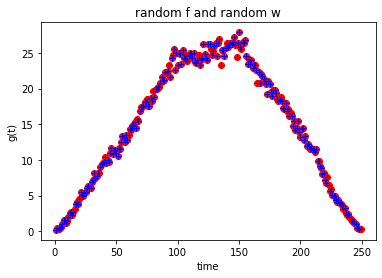

In [230]:
#testing myConv
#making f and w
f=[0]*150
w=[0]*100

#generate a random f
for n in range(len(f)):
    f[n]=np.random.random()
    
#generate a random w
for k in range(len(w)):
    w[k]=np.random.random()

#get g from both convolution function
g = np.convolve(f,w)
g2 = myConv(f,w)
t=np.linspace(1,len(g),len(g))

#plot the resulting function
plt.plot(t, g ,"ro",t,g2,"b+")
plt.xlabel("time")
plt.ylabel("g(t)")
plt.title("random f and random w")
plt.show()

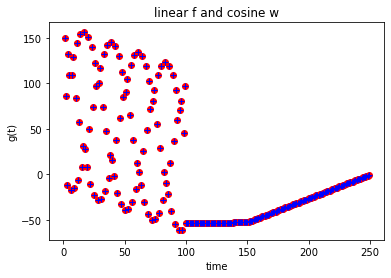

In [231]:
#testing specific functions
f=[0]*150
w=[0]*100

for n in range(len(f)):
    f[n]=150-n
    
for k in range(len(w)):
    w[k]=np.cos(2*k)
    
g = np.convolve(f,w)
g2 = myConv(f,w)
t=np.linspace(1,len(g),len(g))

plt.plot(t, g ,"ro",t,g2,"b+")
plt.xlabel("time")
plt.ylabel("g(t)")
plt.title("linear f and cosine w")
plt.show()

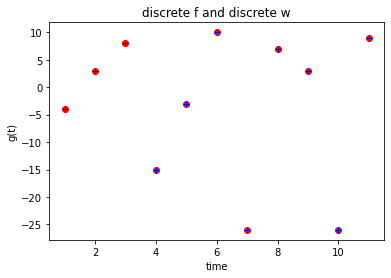

In [232]:
#small discrete test
f1 = [4,5,2,7,6,1,9]
w1 = [-1,2,0,-3,1]

g = np.convolve(f1,w1)
g2 = myConv(f1,w1)
t=np.linspace(1,len(g),len(g))

plt.plot(t, g ,"ro",t,g2,"b+")
plt.xlabel("time")
plt.ylabel("g(t)")
plt.title("discrete f and discrete w")
plt.show()

3.
As seem from the graphs of 3 different tests, myConv and numpy.convolve produces the same result.

[0.0009665489196777344, 0.005017518997192383, 0.396193265914917, 39.228822469711304] [0.0010020732879638672, 0.0, 0.0, 0.045556068420410156]


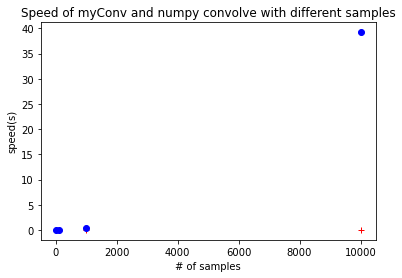

In [233]:
import time

#testing for speed
f1=[0]*10
f2=[0]*100
f3=[0]*1000
f4=[0]*10000

w1=[0]*10
w2=[0]*100
w3=[0]*1000
w4=[0]*10000

np_spd=[0]*4
my_spd=[0]*4
x=[10,100,1000,10000]

#speed for myConv with different number of samples
t1 = time.time()
g = myConv(f1, w1)
t2 = time.time()
my_spd[0]=t2-t1

t1 = time.time()
g = myConv(f2, w2)
t2 = time.time()
my_spd[1]=t2-t1

t1 = time.time()
g = myConv(f3, w3)
t2 = time.time()
my_spd[2]=t2-t1

t1 = time.time()
g = myConv(f4, w4)
t2 = time.time()
my_spd[3]=t2-t1

#speed for numpy convolve
t1 = time.time()
g = np.convolve(f1, w1)
t2 = time.time()
np_spd[0]=t2-t1

t1 = time.time()
g = np.convolve(f2, w2)
t2 = time.time()
np_spd[1]=t2-t1

t1 = time.time()
g = np.convolve(f3, w3)
t2 = time.time()
np_spd[2]=t2-t1

t1 = time.time()
g = np.convolve(f4, w4)
t2 = time.time()
np_spd[3]=t2-t1

print(my_spd,np_spd)

#plot the difference in speed
plt.plot(x, np_spd ,"r+",x,my_spd,"bo")
plt.xlabel("# of samples")
plt.ylabel("speed(s)")
plt.title("Speed of myConv and numpy convolve with different samples")
plt.show()

Q4

As we can see from the result, the speed of numpy convolve remained at less than 1 sec across all different sample sizes.
While myConv can keep up its speed with numpy convolve initially, as the number of sample increases the time required also grew exponentially, with up to over 40 sec with 10k samples. This is probably because I refill the entire array every time I shift w for every instance of g. Due to this the time require to process is guranteed to go up a lot.

# Simple Physical System: RL Circuit Response (7 pts)

### Collaborators: None

Consider a simple physical system consisting of a resistor (with resistance `R`) and an inductor (with
inductance `L`) in series. We apply an input voltage $a(t)$ across the pair in series, and measure the output
voltage $b(t)$ across the inductor alone. For this linear system,

 1. Show analytically that its step response (i.e., the $b(t)$ we obtain when the input voltage $a(t) = H(t)$,
    the Heaviside function) is given by

    $$ S(t) = e^{-Rt/L} H(t), $$

    and its impulse response (i.e., the output voltage $b(t)$ when $a(t) = \delta(t)$) is given by

    $$ R(t) = \delta(t) - \frac{R}{L} e^{-Rt/L} H(t). $$

    _Hint_: Construct and solve the ODE relating the voltages under consideration. Consider the two $b(t)$ choices to derive $S(t)$ and $R(t)$. Formulas $\frac{d}{dt} H(t) = \delta(t)$ and $\delta(t) f(t) = \delta(t) f(0)$ may help.
 2. Discretize the impulse response $R(t)$ function, realizing that $H(t)$ should be discretized as

    $$H = [0.5, 1, 1, \dots],$$

    and $\delta(t)$ should be discretized as

    $$D = [1/dt, 0, 0, \dots].$$

    Take advantage of your `myConv` function, or the NumPy built-in function `convolve`, and write
    your own Python function `V_out = RLresponse(R,L,V_in,dt)` to take an input series $V_{in}$ sampled
    at $\Delta = dt$, and calculate the output series $V_{out}$ sampled by the same $dt$. Please paste your
    Python function here (if you are not using a jupyter notebook). (Hint: here $\Delta$ may not be 1, so remember to build the multiplication of
    $\Delta$ into your convolution function.)
 3. Using $R = 1100 \Omega$, $L = 6 H$, and sampling period $dt = 0.10 \text{ ms}$, test your RL-response
    function with {$H_n$} series (discretized $H(t)$) as input, and plot the output time series (as circles) on
    top of the theoretical curve $S(t)$ given by part 1 (as a solid line). Repeat this for {$D_n$} (discretized
    $\delta(t)$) and $R(t)$. Make the time range of the plots 0 to at least 30 ms. Please list your Python
    code here.

1.

Use kirchhoff's voltage law we can obtain an ODE.
$Vin=Ri+L\frac{di}{dt}$

Rearrange we get:
$\frac{V}{L}-\frac{Ri}{L}=\frac{V}{R}\frac{R}{L}-\frac{Ri}{L}=\frac{di}{dt}$

Separate variable and integrate:
$\int -\frac{R}{L}dt\ = \int\frac{di}{i-\frac{V}{R}}dt$

We get:
$-\frac{R}{L}t = ln(\frac{I-\frac{V}{R}}{I_0-\frac{V}{R}})$

Where $I_0$ is the initial current, which is 0 before t=0.

Exponential both side we get:
$e^{-\frac{R}{L}t} = \frac{V-IR}{V}$

Rearrange for I:
$I=\frac{V}{R} (1-e^{-\frac{R}{L}t})$

If V = H(t) for the step response, then we have
$$S(t) = \int e^{-\frac{R}{L}t} H(n-t)dt = \frac{H(t)}{R} (1-e^{-\frac{R}{L}t})$$
as given.

For the impulse response, notice that it is just the sudden change of the step response at time t=0.
We can just the take the derivative of S(t) at t=0.

Which give us
$ \frac{d}{dt}S(t) = \frac{d}{dt} e^{-Rt/L} H(t) $

Using chain rule, we get
$$ \frac{d}{dt}S(t) = R(t) = e^{-Rt/L}\frac{d}{dt} H(t) + (-\frac{Rt}{L} e^{-Rt/L}) H(t)$$
Since $\frac{d}{dt} H(t)=\delta(t)$ and $e^{-Rt/L}=1$ at t=0.

We have 
$$ R(t) = \delta(t) - \frac{R}{L} e^{-Rt/L} H(t) $$
as given.

2.

As mentioned in lecture, to discretize the step function H(t), we take a small interval of length dt around t = 0, from $-dt/2$ to $dt/2$.
Since the step function jumps from 0 to 1 at time t = 0, this means from $-dt/2$ to 0, H(t) = 0, and from 0 to $dt/2$, H(t) = 1. So the total area under the curve
is 1/2. For t > 0, H(t)=1, so a discretized H(t) from t = 0 would be [1/2,1,1,1...].

To discretize the impulse function, we also take a small interval of length dt around t = 0, from $-dt/2$ to $dt/2$.
Since the integral of the impulse function over all time is equal to 1, and it is 0 everywhere but t=0.
We can deduce that in the a interval around t = 0, its value must necessarily equal to 1/length of the interval for the integral over all time to be 1.
So the discretized impulse function $\delta(t)$=[1/dt,0,0,0...].

In [234]:
#2.
def RLresponse(R,L,dt,v_in):
    
    #system function convolution
    w = np.exp(-R*L*dt)
    
    #convolution value for that particular dt
    v_out = np.convolve(v_in,w)
    
    return v_out


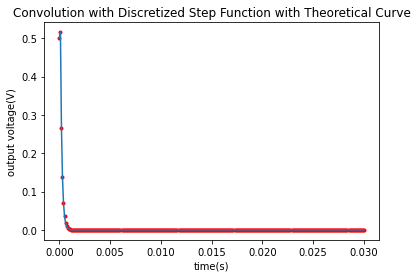

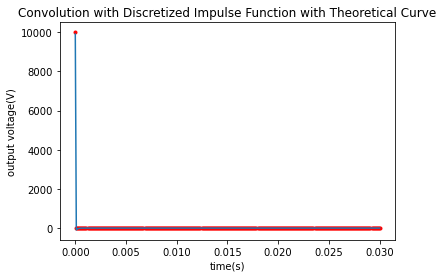

In [235]:
#3.
#parameters
r = 1100
l = 6
dt = 0.1*0.001
maxt = 30*0.001

#input step and impulse function
H = [1]*int(maxt/dt)
de = [0]*int(maxt/dt)

H[0] = 0.5
de[0] = 1/dt

#dicretized convolution functions
t = np.linspace(0,maxt,len(H))
g1 = [0]*(len(H))
R1 = [0]*(len(de))

for n in range(len(H)):
    g1[n] = RLresponse(r,l,t[n],H[n])

for k in range(len(de)):
    R1[k] = RLresponse(r,l,t[k],de[k])

#theoretical curves 
g2 = np.exp(-r*l*t)*H
R2 = de - (r/l)*np.exp(-r*l*t)*H

#ploting theoretical curve with dicretized convolution functions
plt.title("Convolution with Discretized Step Function with Theoretical Curve")
plt.xlabel("time(s)")
plt.ylabel("output voltage(V)")
plt.plot(t,g1,"r.",t,g2)
plt.show()

plt.title("Convolution with Discretized Impulse Function with Theoretical Curve")
plt.xlabel("time(s)")
plt.ylabel("output voltage(V)")
plt.plot(t,R1,"r.",t,R2)
plt.show()



3.

As we can see the discrete convolution matches with the theoretical curve.

# Convolution of a Near-infrared Spectrum (8 pts)

### Collaborators: None

The Total Carbon Column Observing Network (TCCON) is a network of ground-based Fourier transform spectrometers that measure in the near-infrared region (NIR) of the spectrum. These are high spectral resolution instruments that measure the absorption signatures in the NIR of various atmospheric gases. As a result of the high resolution of these instruments, we are able to use the absorption signatures to infer the atmospheric abundance of gases such as CO$_2$, CH$_4$, and H$_2$O. The file `FTIR_ETL_TCCON.asc` contains measurements from a Fourier transform spectrometer at East Trout Lake, Saskatchewan. These are measurements that were made by Prof. Debra Wunch’s group on 20 April 2017. (The file contains the spectrum as a function of wavenumbers $\tilde{\nu} = 1/\lambda$ in units of cm$^{-1}$). One way of simulating the spectrum that might be measured by a low-resolution instrument is by convolving the high-resolution spectrum with the function $2\Delta\sin(2\pi \tilde{\nu}\Delta)/(2\pi \tilde{\nu}\Delta)$, where $\Delta$ is a measure of the spectral resolution.

1. Plot the spectrum at East Trout Lake as a function of wavenumbers. 
2. Plot the function $2\Delta\sin(2\pi \tilde{\nu}\Delta)/(2\pi \tilde{\nu}\Delta)$ over the interval $\tilde{\nu}=[-4,4]$, with $\Delta \tilde{\nu} = 0.007533$ cm$^{-1}$, for values of $\Delta = 1$ and $\Delta =3$.
3.	Use numpy's convolve function to convolve the high-resolution spectrum in the file `FTIR_ETL_TCCON.asc` separately with the two curves in Part 2 (i.e., for $\Delta = 1$ and $\Delta = 3$).
4.	For each of the two cases, plot the original and convolved time series over the wavenumber range $[4000,4050]$. Comment on the differences in the convolved time series between the two cases.
5. Consider convolving the spectrum with the following Gaussian: $g(t) = \frac{1}{\sqrt{\pi}L} e^{-(t/L)^2}.$

   Plot The Guassian for $L=0.5$ (over the interval $[-4,4]$) and the timeseries of the convolution of the TCCON spectrum with the Gaussian (over the range [4000,4050]). Comment on the differences between the this convolved time series and those from Part 4.

__Note__

* The high-resolution spectrum in  `FTIR_ETL_TCCON.asc` is given as a text file with two columns: the first column contains the wavenumber of the measurement (in units of cm$^{-1}$) and the second column has the spectral signal (in arbitrary units).
* Use `mode='same'` when calling numpy convolve to truncate the convolution to the max of the supplied arrays (i.e. length of the high-resolution timeseries in our case). This is convenient, since we want to compare the convolution output to the original timeseries.  
* As a check for Parts 4 and 5, ensure that your convolved timeseries is aligned with (or "overlaps") the original timeseries.

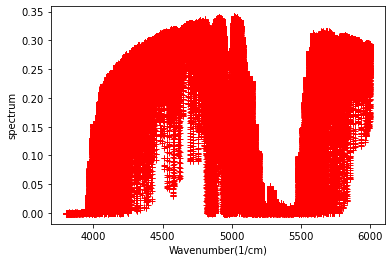

In [236]:
#1
#import data
data = np.loadtxt(r"C:\Users\bruce\OneDrive\Desktop\FTIR_ETL_TCCON.asc")

#separate data by column
wave = data[:,0]
spec = data[:,1]

#plot the data
plt.plot(wave,spec,"r+")
plt.xlabel("Wavenumber(1/cm)")
plt.ylabel("spectrum")
plt.show()

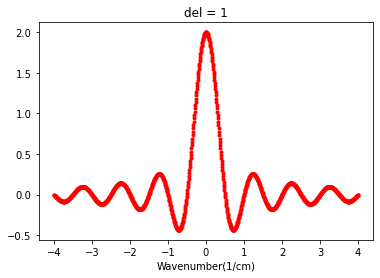

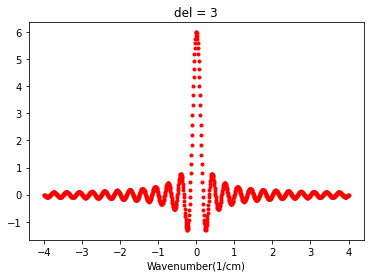

In [237]:
#2
#parameters
dv = 0.007533
de1 = 1
de2 = 3

#range of wavenumber
v = np.linspace(-4,4,int(8/dv)+1)

#functions with different del
f1 = 2*de1*np.sin(2*np.pi*v*de1)/(2*np.pi*v*de1)
f2 = 2*de2*np.sin(2*np.pi*v*de2)/(2*np.pi*v*de2)

#plot the function
plt.title("del = 1")
plt.plot(v,f1,"r.")
plt.xlabel("Wavenumber(1/cm)")
plt.show()

plt.title("del = 3")
plt.plot(v,f2,"r.")
plt.xlabel("Wavenumber(1/cm)")
plt.show()

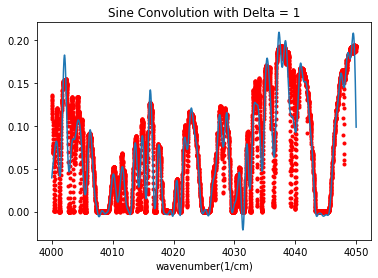

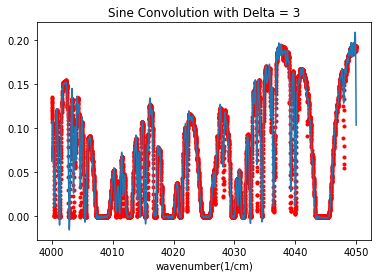

In [228]:
#import data
data = np.loadtxt(r"C:\Users\bruce\OneDrive\Desktop\FTIR_ETL_TCCON.asc")

#separate data by column
wave = data[:,0]
spec = data[:,1]

#smaller data sets in the wavenumber range from 4000 to 4050
s_wave = np.empty(0)
s_spec = np.empty(0)

#take the data that fits wavenumber range from 4000 to 4050
for n in range(len(wave)):
    if wave[n] >= 4000 and wave[n] <= 4050:
        s_wave = np.append(s_wave,wave[n])
        s_spec = np.append(s_spec,spec[n])
        
#parameters
dv = 0.007533
de1 = 1
de2 = 3

#range of wavenumber for convolution functions
v = np.linspace(-4,4,int(8/dv)+1)

#convolve sine functions with different del
f1 = 2*de1*np.sin(2*np.pi*v*de1)/(2*np.pi*v*de1)
f2 = 2*de2*np.sin(2*np.pi*v*de2)/(2*np.pi*v*de2)

#get the convolution between the spectrum and each sine function
g1 = dv*np.convolve(f1,s_spec,'same')
g2 = dv*np.convolve(f2,s_spec,'same')

#plot the convolution against the original time series
plt.title("Sine Convolution with Delta = 1")
plt.plot(s_wave,s_spec,"r.",s_wave,g1)
plt.xlabel("wavenumber(1/cm)")
plt.show()

plt.title("Sine Convolution with Delta = 3")
plt.plot(s_wave,s_spec,"r.",s_wave,g2)
plt.xlabel("wavenumber(1/cm)")
plt.show()

4.

As we can see from the above plot.
The shape of the convoluted series in blue, matches that of the original time series.
We can also see that the value of $\Delta$ has an effect on how similar the shape of the convoluted series matches with the shape of the orginal time series.

When $\Delta$ = 1, there are still places where the shape of the two series does not match (Namely from wavenumber 4000 to 4010, and 4030 to 4040). When $\Delta$ = 3 however, the place where the convoluted series is not matched with the original when $\Delta$ = 1, is now more closely resembled than before. From this I deduce that the higher we set $\Delta$ to be, the closer the shape of the convolution will resemble the original series.

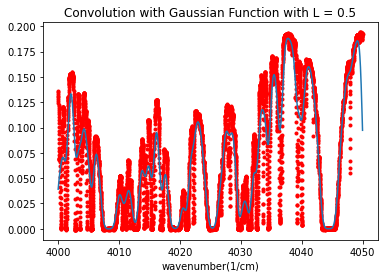

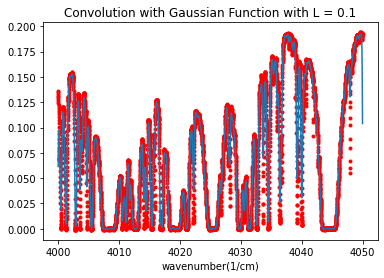

In [227]:
#import data
data = np.loadtxt(r"C:\Users\bruce\OneDrive\Desktop\FTIR_ETL_TCCON.asc")

#separate data by column
wave = data[:,0]
spec = data[:,1]

#smaller data sets in the wavenumber range from 4000 to 4050
s_wave = np.empty(0)
s_spec = np.empty(0)

#take the data that fits wavenumber range from 4000 to 4050
for n in range(len(wave)):
    if wave[n] >= 4000 and wave[n] <= 4050:
        s_wave = np.append(s_wave,wave[n])
        s_spec = np.append(s_spec,spec[n])

#parameters
dv = 0.007533
l = 0.5

#range of wavenumber for convolution functions
v = np.linspace(-4,4,int(8/dv)+1)

#gaussian system function
g = 1/(np.sqrt(np.pi)*l)*np.exp(-((v/l)**2))

#convolute the time series with gaussian
conv = dv*np.convolve(g,s_spec,"same")

#plot the convolution with gaussian
plt.title("Convolution with Gaussian Function with L = 0.5")
plt.plot(s_wave,s_spec,"r.",s_wave,conv)
plt.xlabel("wavenumber(1/cm)")
plt.show()

#try to make gaussian convolution more similar to the original time series by changing the value of L
l2 = 0.1
g = 1/(np.sqrt(np.pi)*l2)*np.exp(-((v/l2)**2))
conv2 = dv*np.convolve(g,s_spec,"same")
plt.title("Convolution with Gaussian Function with L = 0.1")
plt.plot(s_wave,s_spec,"r.",s_wave,conv2)
plt.xlabel("wavenumber(1/cm)")
plt.show()

5.

The Gaussian convolution when L = 0.5 matches with the original time series but is not very precise. This is very similar to the sine function convolution in the previous part where $\Delta$ = 1. After changing the value of L for a bit, I found out that the closer L gets to 0, the more precise the shape of the convolution matches with the original time series. This is also very similar in the previous part, where a greater $\Delta$ value gives more precise match with the original time series.